In [1]:
import numpy as np

data = np.load('professor_teacher_99LFs.npz')  # where * is any file in data/
label_matrix = data['L']  # weak source votes
Xtrain = data['Xtrain']  # features for training on soft labels
Xtest = data['Xtest']  # features for evaluating the model
Ytest = data['Ytest']  # gold labels for evaluating the model

ModuleNotFoundError: No module named 'numpy'

In [2]:
# !pip install datasets
from datasets import load_dataset

train_dataset = load_dataset("LabHC/bias_in_bios", split='train')
test_dataset = load_dataset("LabHC/bias_in_bios", split='test')
dev_dataset = load_dataset("LabHC/bias_in_bios", split='dev')

In [9]:
test_dataset

Dataset({
    features: ['hard_text', 'profession', 'gender'],
    num_rows: 99069
})

In [3]:
import json
from datasets import load_dataset

# Load your dataset
# test_dataset

# Prepare the data in the required format
json_data = [
    {"input": f"Given this description, predict the profession of the indivudual. {test_dataset['hard_text'][i]}. The occupation of the individual is", "output": str(test_dataset['profession'][i])}
    for i in range(0, 1000) # Assuming your dataset is split into 'train'; adjust if different
]

# Define the path to save the JSON file
output_file = './dataset_files/extractive/profession_prediction_1.json'

# Write data to JSON file
with open(output_file, 'w') as f:
    json.dump(json_data, f, indent=4)

print(f"Data saved to {output_file}")


Data saved to ./dataset_files/extractive/profession_prediction_1.json


In [18]:
professions = [
    "accountant",
    "architect",
    "attorney",
    "chiropractor",
    "comedian",
    "composer",
    "dentist",
    "dietitian",
    "dj",
    "filmmaker",
    "interior_designer",
    "journalist",
    "model",
    "nurse",
    "painter"
]
professions += [
    "paralegal",      # 15
    "pastor",         # 16
    "personal_trainer", # 17
    "photographer",   # 18
    "physician",      # 19
    "poet",           # 20
    "professor",      # 21
    "psychologist",   # 22
    "rapper",         # 23
    "software_engineer", # 24
    "surgeon",        # 25
    "teacher",        # 26
    "yoga_teacher"    # 27
]
print(professions)

['accountant', 'architect', 'attorney', 'chiropractor', 'comedian', 'composer', 'dentist', 'dietitian', 'dj', 'filmmaker', 'interior_designer', 'journalist', 'model', 'nurse', 'painter', 'nurse', 'painter', 'paralegal', 'pastor', 'personal_trainer', 'photographer', 'physician', 'poet', 'professor', 'psychologist', 'rapper', 'software_engineer', 'surgeon', 'teacher', 'yoga_teacher']


In [19]:
profession_labels = ['accountant', 'architect', 'attorney', 'chiropractor', 'comedian', 'composer', 'dentist', 'dietitian', 'dj', 'filmmaker', 'interior_designer', 'journalist', 'model', 'nurse', 'painter', 'nurse', 'painter', 'paralegal', 'pastor', 'personal_trainer', 'photographer', 'physician', 'poet', 'professor', 'psychologist', 'rapper', 'software_engineer', 'surgeon', 'teacher', 'yoga_teacher']
print(len(profession_labels))

30


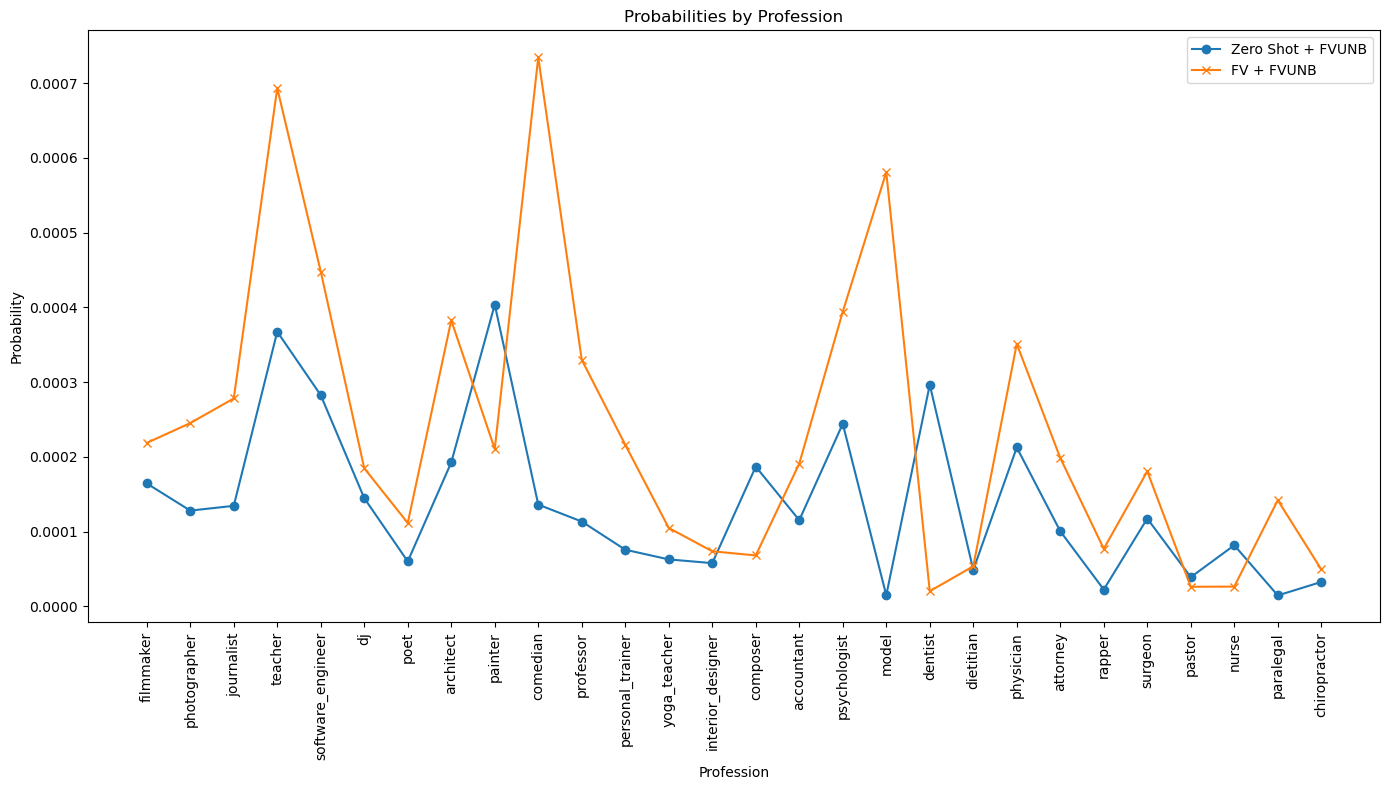

In [1]:
total_prob_gender_zero_shot_plus_fvunb_profession_classify_all=  {'filmmaker': 0.00016434246029152678, 'photographer': 0.00012796684496767257, 'journalist': 0.0001343661957408211, 'teacher': 0.0003673930448605782, 'software_engineer': 0.00028239342180978944, 'dj': 0.00014464563294442248, 'poet': 5.999658182197302e-05, 'architect': 0.00019245828879159972, 'painter': 0.00040370958392272504, 'comedian': 0.00013600921530663822, 'professor': 0.00011335852536563727, 'personal_trainer': 7.564531074940399e-05, 'yoga_teacher': 6.267635942244417e-05, 'interior_designer': 5.768198269807352e-05, 'composer': 0.00018682838299856913, 'accountant': 0.0001152164444678426, 'psychologist': 0.00024415057341316775, 'model': 1.4652896819664902e-05, 'dentist': 0.00029643222263757706, 'dietitian': 4.872470157960486e-05, 'physician': 0.00021248158944147503, 'attorney': 0.00010039762149958165, 'rapper': 2.2327587284277183e-05, 'surgeon': 0.00011737992588634452, 'pastor': 3.8919642773126884e-05, 'nurse': 8.161869912809754e-05, 'paralegal': 1.445919610185175e-05, 'chiropractor': 3.2484492746074604e-05}
total_prob_gender_fv_plus_fvunb_profession_classify_all=  {'filmmaker': 0.00021857440073447647, 'photographer': 0.00024506362616220407, 'journalist': 0.0002780774960282382, 'teacher': 0.0006933414632572641, 'software_engineer': 0.00044783722819491845, 'dj': 0.00018461312173552441, 'poet': 0.00011144978341803835, 'architect': 0.0003826357112356003, 'professor': 0.0002104350236871088, 'painter': 0.0007346564166616243, 'composer': 0.00032973471124197367, 'comedian': 0.00021603656435197936, 'personal_trainer': 0.00010473902323665845, 'yoga_teacher': 7.354490277632288e-05, 'interior_designer': 6.79981403680706e-05, 'accountant': 0.00019088573047387105, 'psychologist': 0.0003941710170010992, 'dentist': 0.0005809117534868967, 'model': 2.0130130475509383e-05, 'dietitian': 5.346655381318295e-05, 'physician': 0.00035102740723503114, 'attorney': 0.00019842141677824877, 'pastor': 7.691085266769198e-05, 'surgeon': 0.0001804864450126561, 'rapper': 2.6067937050931826e-05, 'paralegal': 2.627923038971022e-05, 'nurse': 0.0001419308397009231, 'chiropractor': 4.930446700132553e-05}



import matplotlib.pyplot as plt

# Extract profession names and values from both dictionaries
professions = total_prob_gender_zero_shot_plus_fvunb_profession_classify_all.keys()
zero_shot_values = total_prob_gender_zero_shot_plus_fvunb_profession_classify_all.values()
fv_plus_values = total_prob_gender_fv_plus_fvunb_profession_classify_all.values()

# Create a plot
plt.figure(figsize=(14, 8))
plt.plot(professions, zero_shot_values, label='Zero Shot + FVUNB', marker='o')
plt.plot(professions, fv_plus_values, label='FV + FVUNB', marker='x')

# Adding titles and labels
plt.title('Probabilities by Profession')
plt.xlabel('Profession')
plt.ylabel('Probability')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

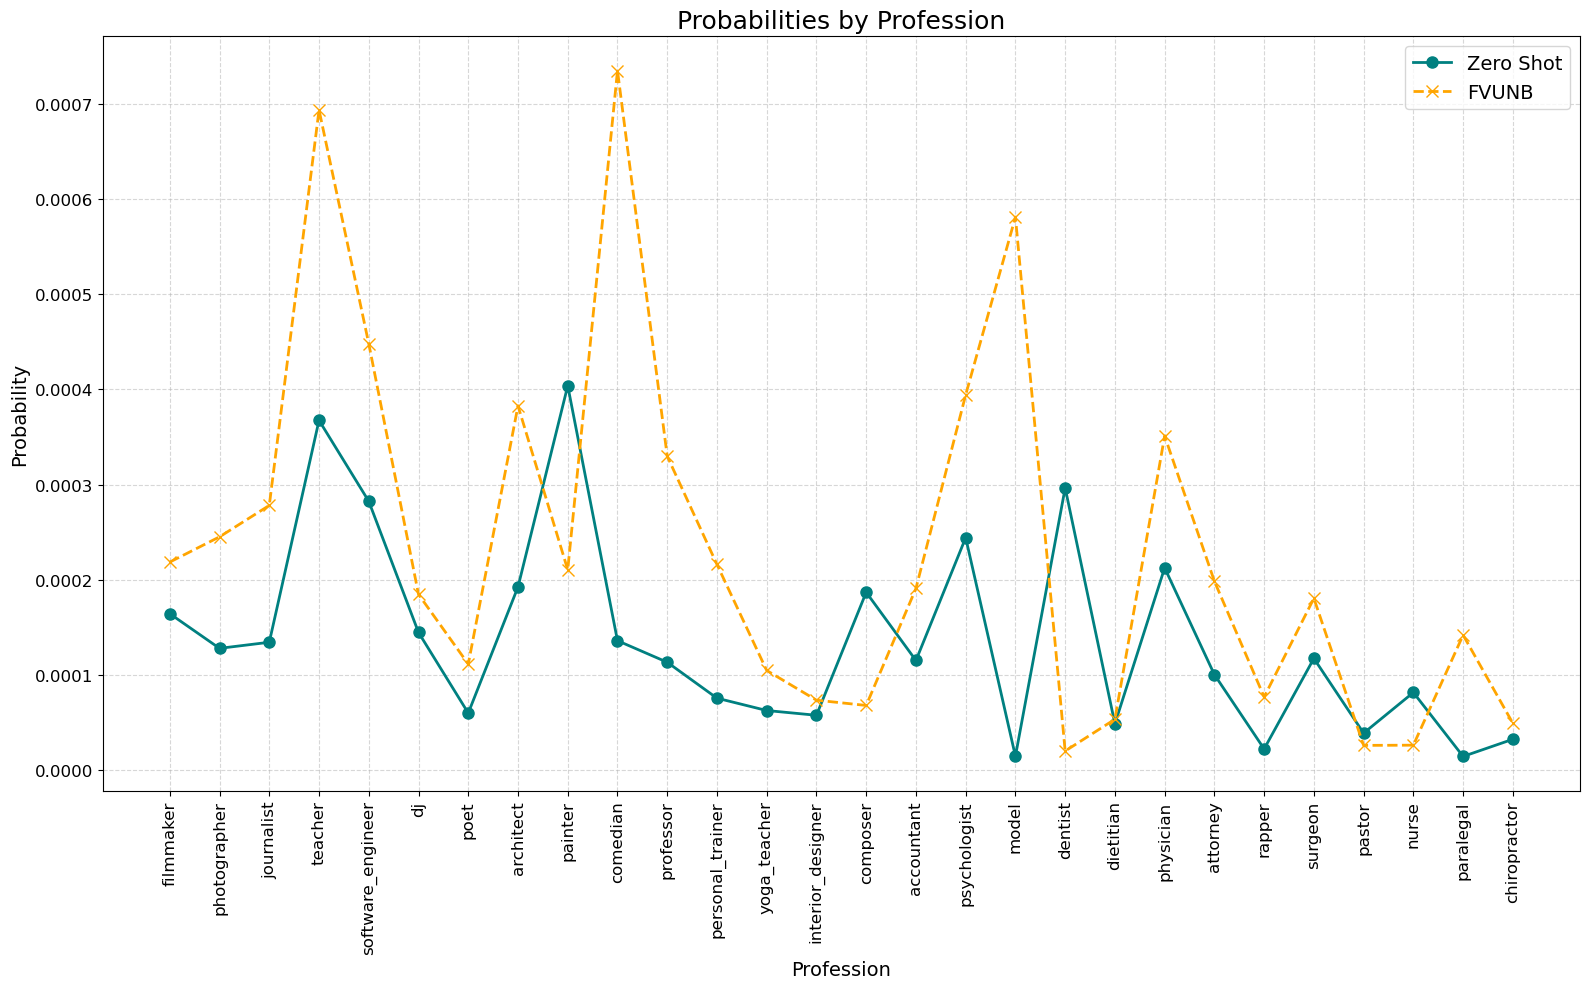

In [3]:
plt.figure(figsize=(16, 10))
plt.plot(professions, zero_shot_values, label='Zero Shot', marker='o', linestyle='-', color='teal', linewidth=2, markersize=8)
plt.plot(professions, fv_plus_values, label='FVUNB', marker='x', linestyle='--', color='orange', linewidth=2, markersize=8)

# Adding titles and labels
plt.title('Probabilities by Profession', fontsize=18)
plt.xlabel('Profession', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)  # Adding grid with a light dashed line

# Show the plot
plt.tight_layout()
plt.show()